In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy

from sklearn import preprocessing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df  = pd.read_csv('personal-loan.csv')
df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


In [3]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 6000
Total Number of columns : 13


In [4]:
df.isnull().sum() 

customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64

In [5]:
df1 = df.dropna()
print(df1)

      customer_id   age  yrs_experience  family_size  \
0            3815  40.0             9.0          3.0   
1            5737  65.0            27.0          4.0   
2            4209  61.0             3.0          2.0   
3            4734  29.0            14.0          1.0   
4            2551  43.0            23.0          4.0   
...           ...   ...             ...          ...   
5994          542  60.0             0.0          3.0   
5995         5440  36.0             4.0          1.0   
5996         1251  56.0            25.0          2.0   
5997         2454  34.0            11.0          2.0   
5999         1409  47.0            22.0          3.0   

               education_level  income  mortgage_amt credit_card_acct  \
0                     Graduate    60.0             0              yes   
1     Advanced or Professional    36.0            90               no   
2                Undergraduate   145.0           314               no   
3                Undergraduate    5

In [6]:
df1.isnull().sum() 

customer_id           0
age                   0
yrs_experience        0
family_size           0
education_level       0
income                0
mortgage_amt          0
credit_card_acct      0
credit_card_spend     0
share_trading_acct    0
fixed_deposit_acct    0
online_acct           0
personal_loan         0
dtype: int64

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,5410.0,3038.500739,1717.697577,3.0,1575.5,3054.5,4511.0,6000.0
age,5410.0,45.046580,12.551335,23.0,34.0,45.0,56.0,92.0
yrs_experience,5410.0,20.602033,12.419831,0.0,10.0,21.0,31.0,64.0
family_size,5410.0,2.421442,1.138505,1.0,1.0,2.0,3.0,7.0
income,5410.0,86.360259,45.416852,8.0,52.0,82.0,117.0,223.0
mortgage_amt,5410.0,68.638447,88.943678,0.0,0.0,0.0,126.0,617.0
credit_card_spend,5410.0,0.593530,1.332406,0.0,0.0,0.0,0.4,9.5
share_trading_acct,5410.0,0.098521,0.298046,0.0,0.0,0.0,0.0,1.0
fixed_deposit_acct,5410.0,0.082994,0.275899,0.0,0.0,0.0,0.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


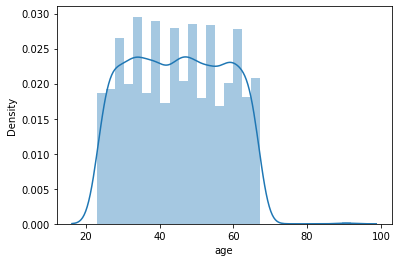

In [8]:
sns.distplot(df1['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


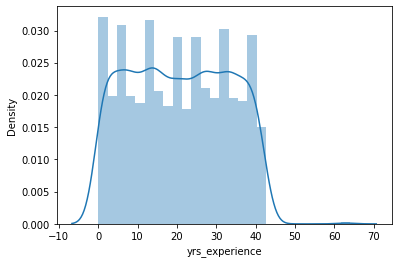

In [9]:
sns.distplot(df1['yrs_experience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


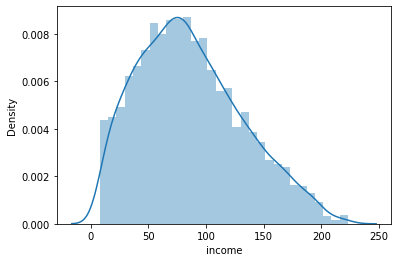

In [10]:
sns.distplot(df1['income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


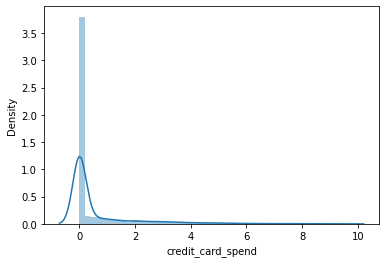

In [11]:
sns.distplot(df1['credit_card_spend'])

In [12]:
loan_counts = pd.DataFrame(df1["personal_loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,no,4510
1,yes,900


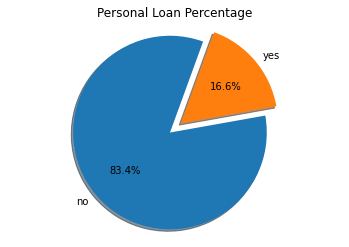

In [13]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income Distribution')

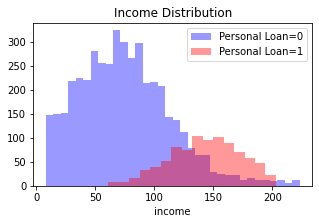

In [23]:
plt.figure(figsize=(5,3))
sns.distplot(df1[df1['personal_loan'] == 0]['income'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df1[df1['personal_loan'] == 1]['income'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

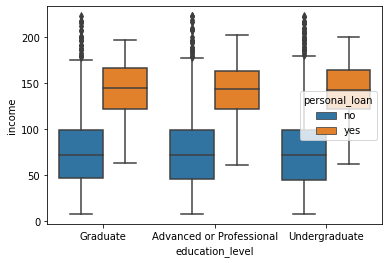

In [14]:
sns.boxplot(x='education_level', y='income', hue='personal_loan', data = df1)

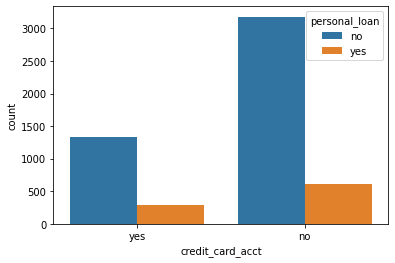

In [15]:
sns.countplot(x="credit_card_acct", data=df1,hue="personal_loan")

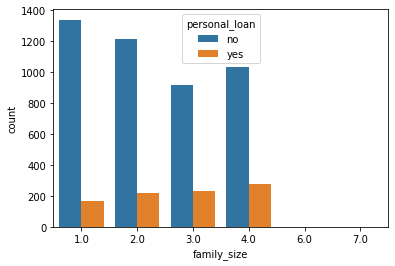

In [16]:
sns.countplot(x='family_size',data=df1,hue='personal_loan')

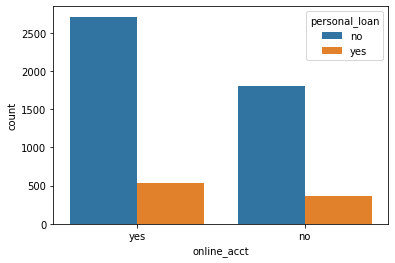

In [17]:
sns.countplot(x='online_acct',data=df1,hue='personal_loan')

In [18]:
# replacing values
df1['education_level'].replace(['Undergraduate', 'Graduate','Advanced or Professional'],
                        [1,2,3], inplace=True)
df1['credit_card_acct'].replace(['yes','no'],
                        [1,0], inplace=True)
df1['online_acct'].replace(['yes','no'],
                        [1,0], inplace=True)
df1['personal_loan'].replace(['yes','no'],
                        [1,0], inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
df1

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,2,60.0,0,1,1.7,0,0,1,0
1,5737,65.0,27.0,4.0,3,36.0,90,0,0.0,0,0,1,0
2,4209,61.0,3.0,2.0,1,145.0,314,0,0.0,0,1,1,1
3,4734,29.0,14.0,1.0,1,52.0,0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,2,33.0,0,0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,542,60.0,0.0,3.0,1,178.0,78,0,0.0,0,0,0,0
5995,5440,36.0,4.0,1.0,1,72.0,0,0,0.0,0,0,1,0
5996,1251,56.0,25.0,2.0,1,110.0,0,0,0.0,0,0,0,0
5997,2454,34.0,11.0,2.0,3,57.0,0,0,0.0,1,0,1,0


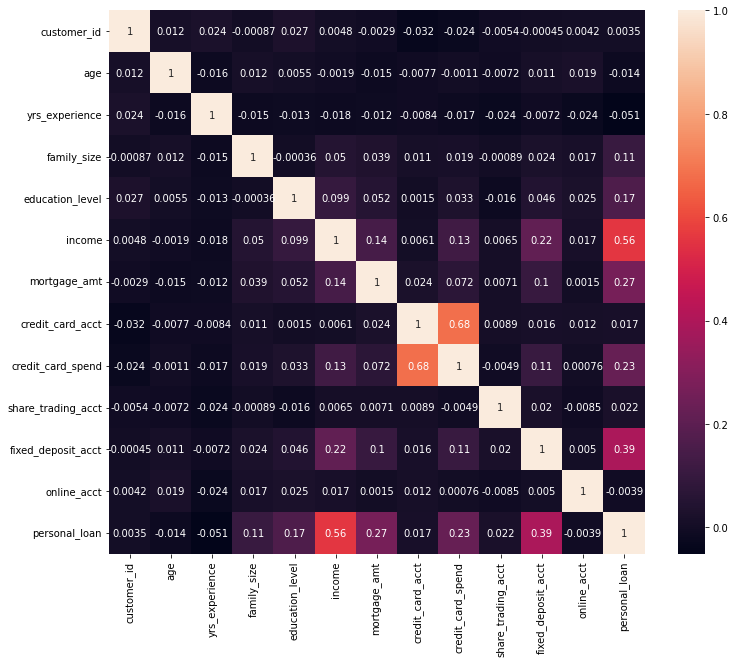

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True)